In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sig(x):
  return 1/(1+np.exp(-x))

In [ ]:
def error(y,Y):
  d=Y-y
  return np.dot(d,d)

We will use a simple Two layer network to find the mystery function

In [ ]:
def mystery_fn(x):
  return 3*x**2 + 2*x + 1

Datapoints

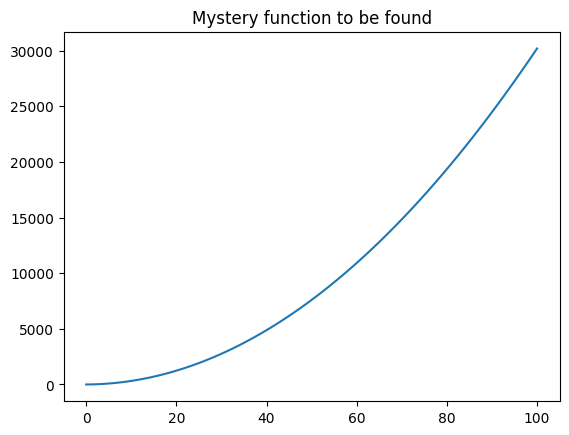

In [ ]:
X=np.linspace(0,100,100)
Y=mystery_fn(X)
plt.plot(X,Y)
plt.title("Mystery function to be found")
plt.show()

First lets initialise random weight for our network

In [ ]:
def parameter_maker():
  n_layer=4

  arc={1:8,2:4,3:2,4:1}
  arc_weight_lenght={1:1,2:8,3:4,4:2} # this tells us the no of connection each neuron has in a layer

  weight={}
  d={} # this dict contain all the parameter we want

  for i in range(1,n_layer+1):
    for j in range(1,arc[i]+1):
      name=int(str(i)+str(j))
      d[name]=[np.random.randint(-100,100,size=arc_weight_lenght[i]),np.random.rand(1)]
  return d

In [ ]:
l=[]
for i in range(1000):
  l.append(parameter_maker())
l_copy=l.copy()

In [ ]:
def plus_minus():
  return 1 if np.random.rand()>0.5 else -1

In [ ]:
def parameter_changer(winner):
  n_layer=4

  arc={1:8,2:4,3:2,4:1}
  arc_weight_lenght={1:1,2:8,3:4,4:2} # this tells us the no of connection each neuron has in a layer

  weight={}
  d={} # this dict contain all the parameter we want

  for i in range(1,n_layer+1):
    for j in range(1,arc[i]+1):
      name=int(str(i)+str(j))
      d[name]=[winner[name][0]+plus_minus()*np.random.rand(np.size(winner[name][0])),winner[name][1]+plus_minus()*np.random.rand(np.size(winner[name][1]))]
  return d

Defining each layer as a function

In [ ]:
def L1(k,input):
  global l
  O1=sig(np.dot(l[k-1][11][0],np.array([input]))+l[k-1][11][1])
  O2=sig(np.dot(l[k-1][12][0],np.array([input]))+l[k-1][12][1])
  O3=sig(np.dot(l[k-1][13][0],np.array([input]))+l[k-1][13][1])
  O4=sig(np.dot(l[k-1][14][0],np.array([input]))+l[k-1][14][1])
  O5=sig(np.dot(l[k-1][15][0],np.array([input]))+l[k-1][15][1])
  O6=sig(np.dot(l[k-1][16][0],np.array([input]))+l[k-1][16][1])
  O7=sig(np.dot(l[k-1][17][0],np.array([input]))+l[k-1][17][1])
  O8=sig(np.dot(l[k-1][18][0],np.array([input]))+l[k-1][18][1])
  return np.array([O1,O2,O3,O4,O5,O6,O7,O8])


In [ ]:
def L2(k,input):
  global l
  O1=sig(np.dot(l[k-1][21][0],input)+l[k-1][21][1])
  O2=sig(np.dot(l[k-1][22][0],input)+l[k-1][22][1])
  O3=sig(np.dot(l[k-1][23][0],input)+l[k-1][23][1])
  O4=sig(np.dot(l[k-1][24][0],input)+l[k-1][24][1])
  return np.array([O1,O2,O3,O4])


In [ ]:
def L3(k,input):
  global l
  O1=sig(np.dot(l[k-1][31][0],input)+l[k-1][31][1])
  O2=sig(np.dot(l[k-1][32][0],input)+l[k-1][32][1])
  return np.array([O1,O2])

In [ ]:
def L4(k,input):
  global l
  O1=(np.dot(l[k-1][41][0],input)+l[k-1][41][1])
  return np.array([O1])

In [ ]:
# we handle entire network as one single function
def NN(k,input):
  return L4(k,L3(k,L2(k,L1(k,input))))

In [ ]:
for _ in range(1000): # no of generation
  score=[]
  for k in range(1,len(l)+1):
    y=[]
    for x in X:
      y.append(float(NN(k,x)))
    score.append(error(Y,np.array(y)))
  winning_species=score.index(min(score))
  print(min(score))
  l=[]
  for i in range(1000):
    l.append(parameter_changer(l_copy[winning_species]))

In [ ]:
import numpy as np

# Assuming NN and error are defined elsewhere

for _ in range(1000):  # number of generations
    # Preallocate score array
    score = np.zeros(len(l))

    # Vectorized computation of y for all k and X
    for k in range(1, len(l) + 1):
        # Use a vectorized approach if NN can handle it
        y = np.array([float(NN(k, x)) for x in X])  # This can be optimized if NN supports vectorization
        score[k - 1] = error(Y, y)  # Store the error directly

    winning_species = np.argmin(score)  # Get the index of the minimum score
    print(score[winning_species])  # Print the minimum score

    # Use list comprehension for parameter changing
    l = [parameter_changer(l_copy[winning_species]) for _ in range(1000)]
